In [1]:
# imports

import os
import sys
import math
import networkx as nx
import matplotlib.pyplot as plt
from pycausal.pycausal import pycausal

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
aitia = App()

In [7]:
feature_selection_list = []
feature_selection_list.append(aitia.feature_selection.LINEAR_REGRESSION)
# feature_selection_list.append(aitia.feature_selection.RANDOM_FOREST)

In [3]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
# algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [4]:
pc = pycausal()
pc.start_vm()

In [5]:
hepar2_df = aitia.data.hepar2_10k_data()

In [8]:
results, summary, target_graph, all_results = aitia.run_analysis_with_high_low( 
                                               hepar2_df,
                                               target_graph_str=None, # no target graph, one will be created
                                               feature_high=20, feature_low=10,
                                               feature_selection_list=feature_selection_list,
                                               algorithm_list=algorithm_list,
                                               pc=pc)

No target graph has been supplied.
The system will generate an approximate target graph using the greedy hill climbing algorithm.
-----------------------------------------------
Starting analysis with 20 features...
Running causal discovery on features selected by LINEAR_REGRESSION
There are 0 latent edges in the reduced dataset
Running causal discovery using PC
Completed causal discovery on features selected by LINEAR_REGRESSION
Completed analysis.
Completed analysis with 20 features...
-----------------------------------------------
Starting analysis with 19 features...
Running causal discovery on features selected by LINEAR_REGRESSION
There are 0 latent edges in the reduced dataset
Running causal discovery using PC
Completed causal discovery on features selected by LINEAR_REGRESSION
Completed analysis.
Completed analysis with 19 features...
-----------------------------------------------
Starting analysis with 18 features...
Running causal discovery on features selected by LINEAR_RE

In [9]:
from IPython.display import display, HTML

display(HTML(summary.to_html()))

,No. of Features Req.,Causal Algorithm,Feature Selection Method,AUPR,SHD
0,16,PC,LINEAR_REGRESSION,0.119999,105


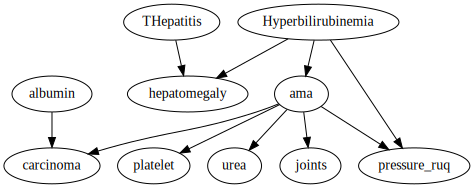

In [13]:
results[0].causal_graph_with_latent_edges.draw()

In [10]:
display(HTML(all_results.to_html()))

,No. of Features Req.,Causal Algorithm,Feature Selection Method,AUPR,SHD
0,20,PC,LINEAR_REGRESSION,0.103895,112
1,19,PC,LINEAR_REGRESSION,0.078822,112
2,18,PC,LINEAR_REGRESSION,0.091428,109
3,17,PC,LINEAR_REGRESSION,0.110908,106
4,16,PC,LINEAR_REGRESSION,0.119999,105
5,15,PC,LINEAR_REGRESSION,0.010102,107
6,14,PC,LINEAR_REGRESSION,0.010102,105
7,13,PC,LINEAR_REGRESSION,0.010102,105
8,12,PC,LINEAR_REGRESSION,0.010102,105
9,11,PC,LINEAR_REGRESSION,0.010102,105


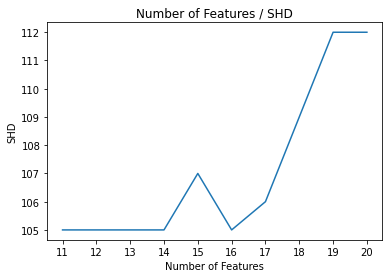

In [11]:
plt.plot(all_results['No. of Features Req.'], all_results['SHD'])
xint = range(min(all_results['No. of Features Req.']), math.ceil(max(all_results['No. of Features Req.']))+1)
plt.xticks(xint)
plt.title('Number of Features / SHD')
plt.xlabel('Number of Features')
plt.ylabel('SHD')
plt.show()

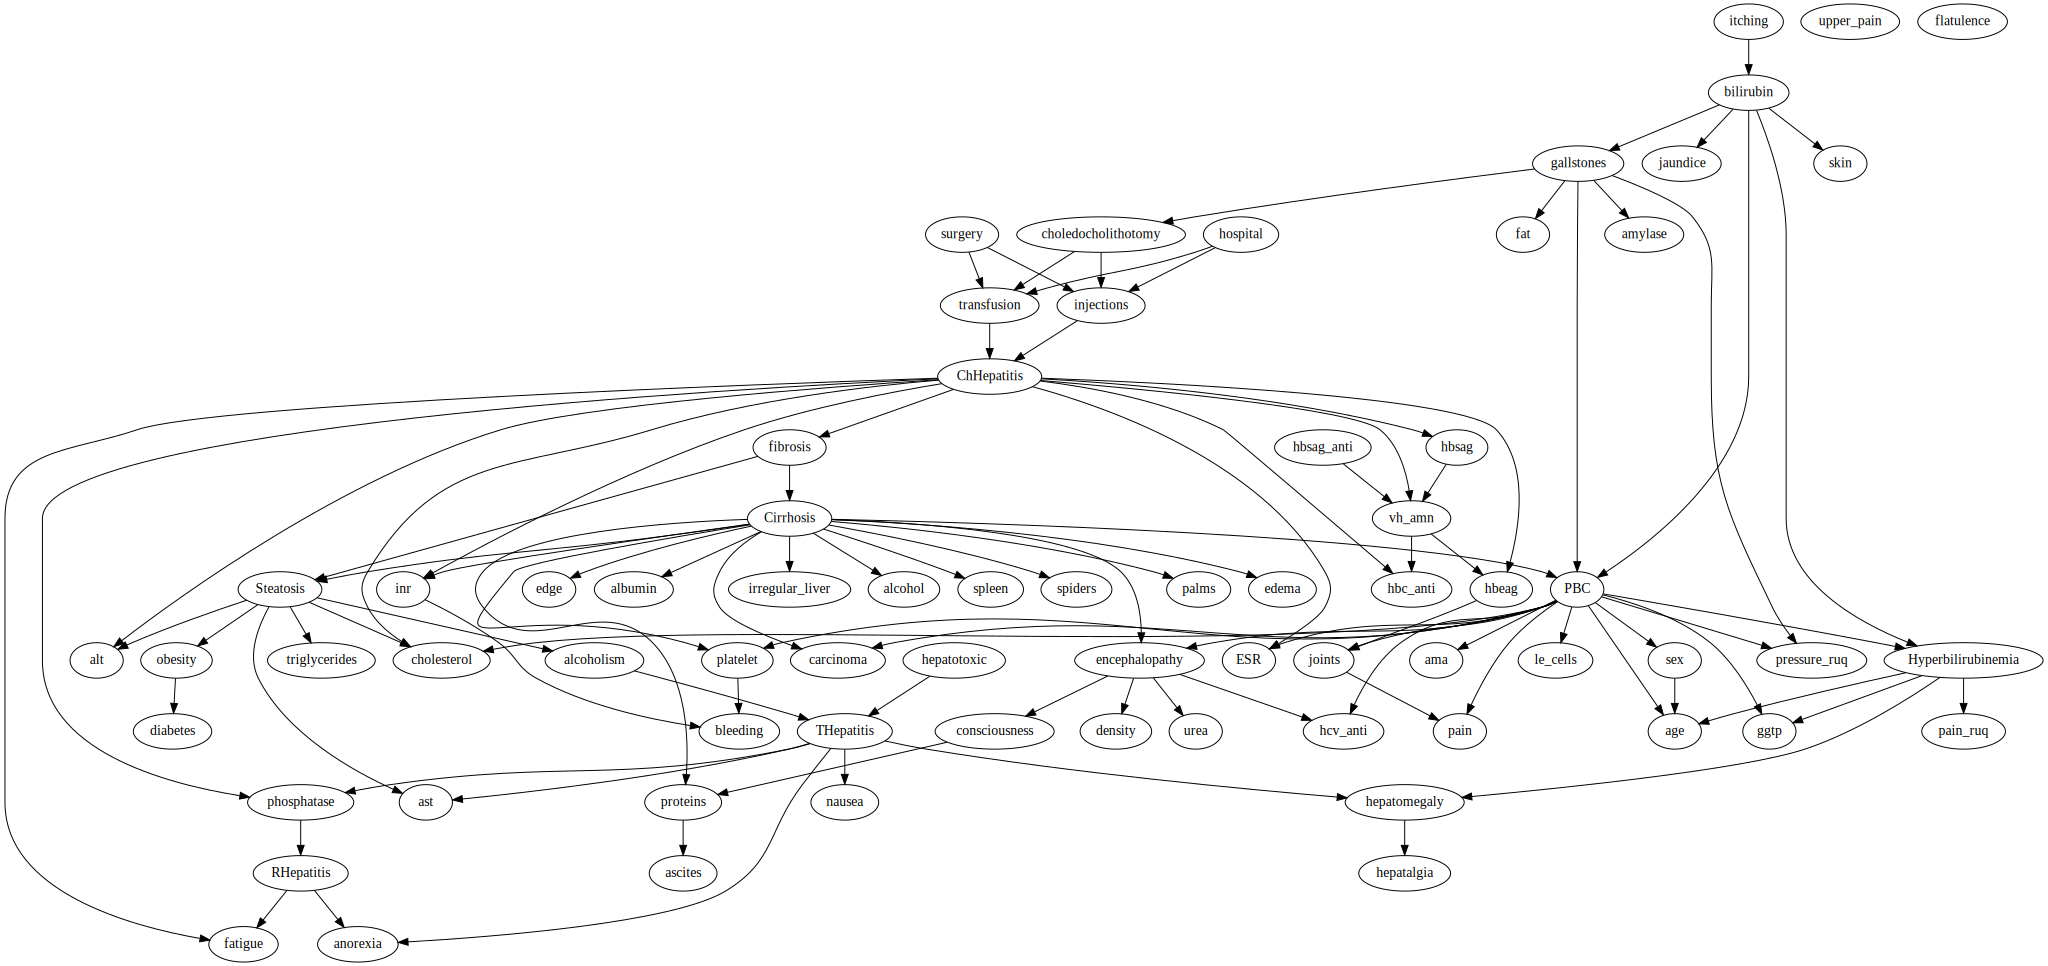

In [15]:
target_graph.draw()